In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df=df.drop(labels=['id'],axis=1)

In [4]:
## Independent and dependent features
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

In [5]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [6]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

---
---

## Build Pipelines 

In [7]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [8]:
## Pipeline for Feature Engineering
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


## Train-Test Split

In [9]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [10]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [11]:
X_train.head()

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.975439,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150,0.874076,1.528722,1.352731
1,0.235195,1.833637,-0.121531,0.318447,0.279859,0.485354,-2.144558,-0.935071,-0.646786
2,0.494617,0.815855,0.399800,0.570855,0.606458,0.673737,-0.132136,0.296826,0.686225
3,-1.018676,0.260701,0.921131,-1.214034,-1.244270,-1.195605,-0.132136,0.296826,0.019720
4,-0.953821,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168,0.874076,2.144670,1.352731


---
---

### Model Training

In [12]:
## Import Necessory models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

## Data preprocessing and feature scalling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## Metriics to check the accuracy of data
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [13]:
Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)

LinearRegression()

In [14]:
Linear_model.coef_

array([[ 6433.66003594,  -132.75843566,   -70.42922179, -1720.30971463,
         -499.29302619,   -63.39317848,    72.44537247,  -460.41604642,
          650.76431652]])

In [15]:
Linear_model.intercept_

array([3970.76628955])

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
## Train multiple models
## Model Evaluation
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Elasticnet': ElasticNet(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

trained_model_list = []
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    
    # Flatten y_train and y_test using .values.flatten() to avoid the DataConversionWarning
    model.fit(X_train, y_train.values.flatten())  # Fix by using .values.flatten()

    # Make Predictions
    y_pred = model.predict(X_test)

    # Evaluation Matrices MAE, RMSE,
    mae, rmse, r2_square = evaluate_model(y_test, y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R² score", r2_square * 100)

    r2_list.append(r2_square)

    print('=' * 35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 1013.9047094344004
MAE: 674.0255115796832
R² score 93.68908248567512


Lasso
Model Training Performance
RMSE: 1013.8784226767013
MAE: 675.0716923362158
R² score 93.68940971841704


Ridge
Model Training Performance
RMSE: 1013.9059272771643
MAE: 674.0555800798212
R² score 93.68906732505938


Elasticnet
Model Training Performance
RMSE: 1533.4162456064048
MAE: 1060.7368759154729
R² score 85.56494831165182


DecisionTreeRegressor
Model Training Performance
RMSE: 837.4806665416355
MAE: 423.26496992239515
R² score 95.69425998323415


RandomForestRegressor
Model Training Performance
RMSE: 610.1924895809893
MAE: 311.25234865626584
R² score 97.71423310176743


AdaBoostRegressor
Model Training Performance
RMSE: 1269.925168667353
MAE: 896.1291491638524
R² score 90.09956026776756


KNeighborsRegressor
Model Training Performance
RMSE: 668.5530817778828
MAE: 350.77162832346045
R² score 97.25608904612422




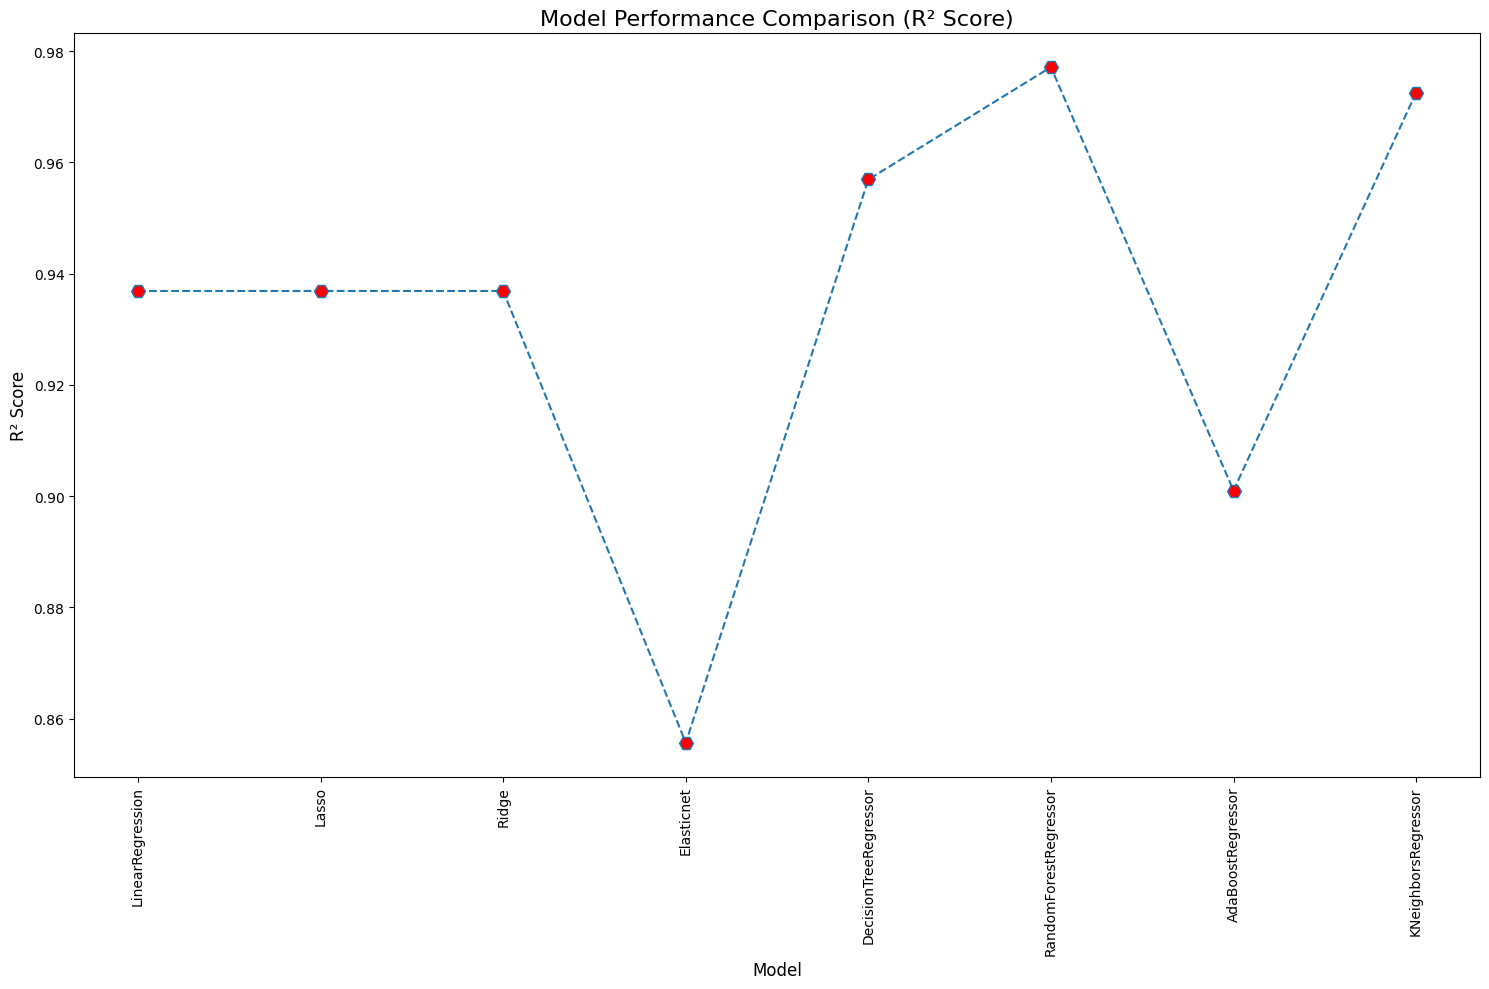

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the results
fig = plt.figure(figsize=(15, 10))
plt.plot(model_list, r2_list, linestyle='dashed', marker='H', mfc='r', ms=10)

# Set labels and title
plt.title('Model Performance Comparison (R² Score)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

---
---


Erro Occur: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

### Fix:
1. **Using `.values.flatten()`** (recommended approach):
   - This will convert the `DataFrame` into a NumPy array and flatten it to a 1D array.


### Explanation:
- `y_train.values.flatten()` converts the `y_train` DataFrame to a NumPy array and flattens it into a 1D array. This is what Scikit-learn expects for the target variable.
- This approach should work without triggering the `'DataFrame' object has no attribute 'ravel'` error and resolve the warning as well.

### Alternative Approach: Use `.ravel()` on `Series`
If `y_train` is a pandas `Series`, you can directly apply `.ravel()`:

```python
model.fit(X_train, y_train.ravel())  # Works only if y_train is a Series
```

However, `.values.flatten()` is a safer option, as it works with both `DataFrame` and `Series` objects.

### Conclusion:
Using `y_train.values.flatten()` will fix the issue, flattening the `DataFrame` and allowing the model to accept the target variable in the required 1D format.